## Imports

In [1]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from tools.functions import *

### Get the Data Paths

In [10]:
# Get the lists of file paths
agents = getFilePaths(Path.cwd(), header="Select the File", verbose=True)

In [15]:
# Get the list of dataframes from the lists of file paths
agents_dfs = readCSVFiles(agents)

# get the list of average and std for all the dataframes
unique_headers = ['Time', 'Reward', 'Height', 'Motor1Pos', 'Motor1Vel', 'Motor2Pos', 'Motor2Vel']

agents_dfs_final = []
for data in agents_dfs:
    agents_dfs_final.append(parseDataFrame(data, unique_headers))

### Plot All

Time


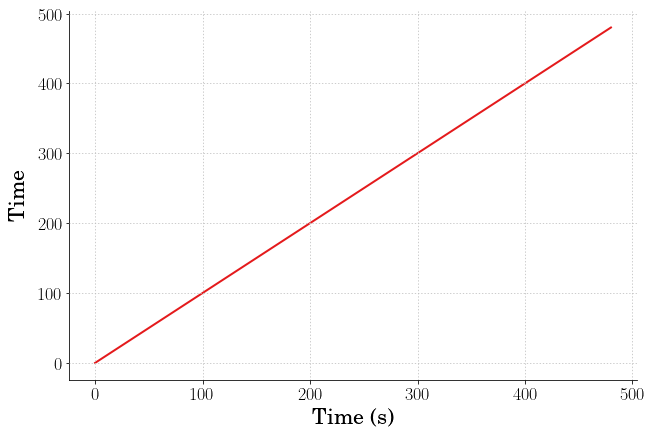

Reward


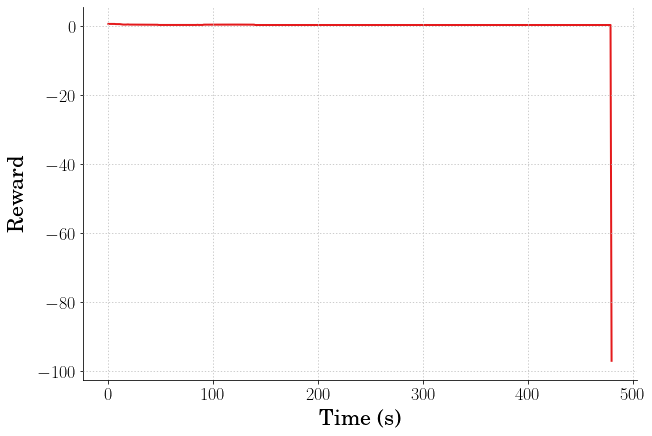

Height


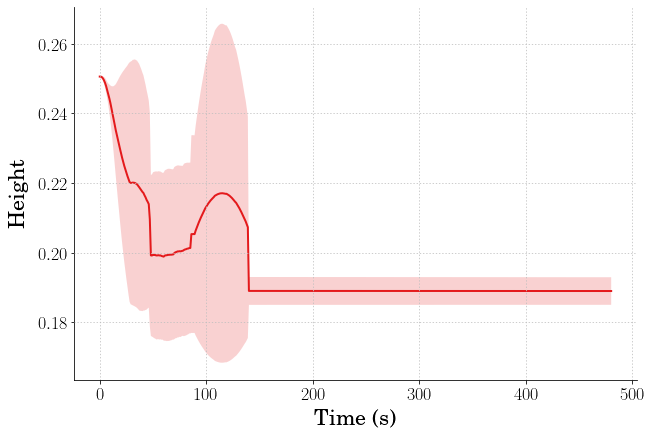

Motor1Pos


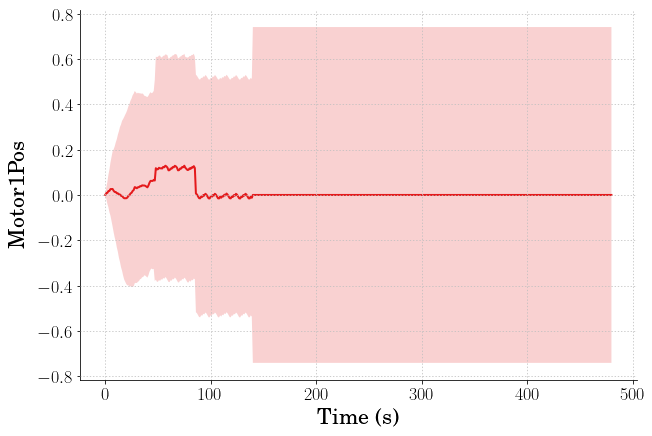

Motor1Vel


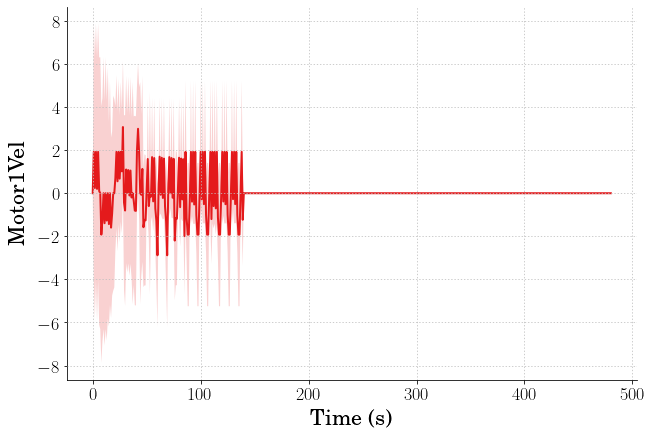

Motor2Pos


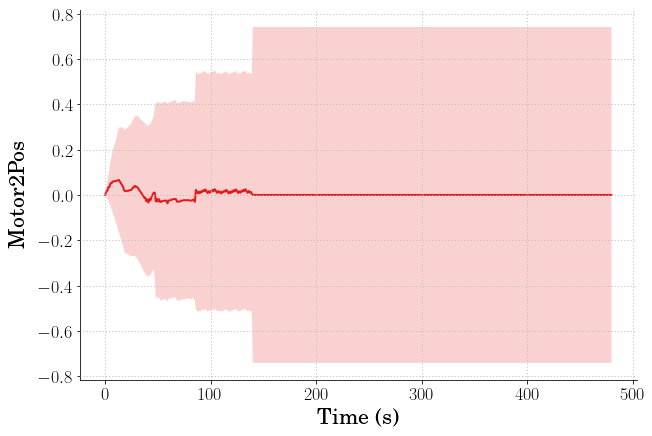

Motor2Vel


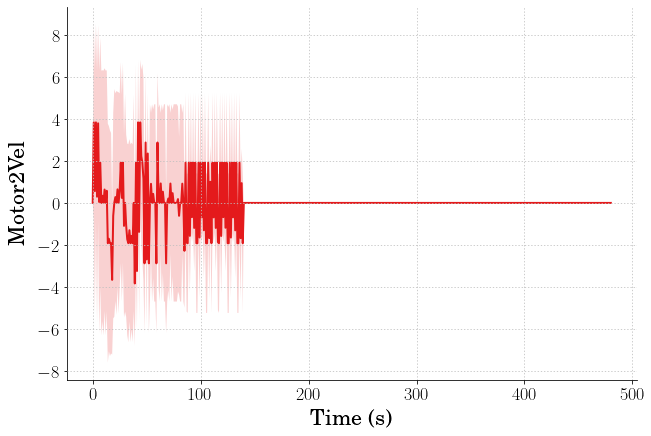

In [17]:
for header in agents_dfs_final[0]:
    print(header)

    X_NR_MEAN, X_NR_STD = dfAverageStd(agents_dfs_final[0]["Time"])
    Y_NR_MEAN, Y_NR_STD = dfAverageStd(agents_dfs_final[0][header])

    # Set the plot size - 3x2 aspect ratio is best
    fig = plt.figure(figsize=(9,6))
    ax = plt.gca()

    # Define the X and Y axis labels
    plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
    plt.ylabel(header, fontsize=22, weight='bold', labelpad=10)

    plt.plot(X_NR_MEAN, Y_NR_MEAN, linewidth=2, linestyle='-', label=header)
    plt.fill_between(X_NR_MEAN, Y_NR_MEAN - Y_NR_STD, Y_NR_MEAN + Y_NR_STD, alpha=0.2)
    # plt.plot(X_R_MEAN, Y_R_MEAN, linewidth=2, linestyle='-', label=header)
    # plt.fill_between(X_R_MEAN, Y_R_MEAN - Y_R_STD, Y_R_MEAN + Y_R_STD, alpha=0.2)
            
    # uncomment below and set limits if needed
    # plt.xlim(0,1.25)
    # plt.ylim(bottom=None, top=1.75)

    # Create the legend, then fix the fontsize
    # leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
    # ltext  = leg.get_texts()
    # plt.setp(ltext, fontsize=18)

    # Adjust the page layout filling the page using the new tight_layout command
    plt.tight_layout(pad=0.5)

    # save the figure as a high-res pdf in the current folder
    # filename = 'MostEfficientAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
    # path = save_path / filename
    # if SAVE_FIG is True:
        # plt.savefig(path, transparent=True)
        # pass
    plt.show()

### Find the Best Agent

In [34]:
max_rew = 0
agents = []
agent_indices = []
for agent in agents_dfs_final:
    for column in agent["Reward"]:
        if np.max(agent["Reward"][column]) > max_rew:
            max_rew = np.max(agent["Reward"][column])
            agent_col = column
            # get the index of the agent
            agent_index = agent["Reward"].columns.get_loc(agent_col)
    agents.append(agent_col)
    agent_indices.append(agent_index)

### Plot Best Agents

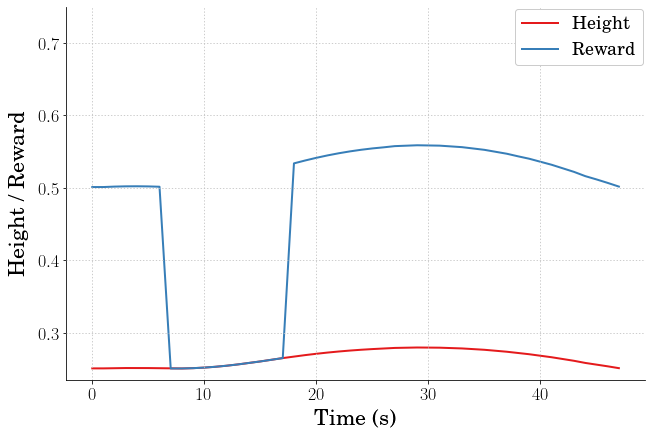

In [35]:

Y_1 = agents_dfs_final[0]["Height"].iloc[:, agent_indices[0]]
Y_2 = agents_dfs_final[0]["Reward"].iloc[:, agent_indices[0]]
X = agents_dfs_final[0]["Time"].iloc[:, agent_indices[0]]

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(9,6))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r"Height / Reward", fontsize=22, weight='bold', labelpad=10)
# plt.ylabel(r"Height (m)", fontsize=22, weight='bold', labelpad=10)

plt.plot(X, Y_1, linewidth=2, linestyle='-', label="Height")
plt.plot(X, Y_2, linewidth=2, linestyle='-', label="Reward")
        
# uncomment below and set limits if needed
# plt.xlim(0,1.25)
plt.ylim(bottom=None, top=0.75)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = f'best_{plot_type}_.svg'
# plt.savefig(filename, transparent=True)
plt.show()